# Libraries

In [2]:
import pandas
import matplotlib.pyplot as plt
pandas.set_option('max_rows', 20)
pandas.set_option('max_columns',150)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# Data Importing & Preprocessing

In [26]:
fileName = "Processed [Fall 2019] SSS Final Combined Dataset.xlsx"
SSSFinalCombinedData = pandas.read_excel(fileName, sheet_name=1)
SSSFinalCombinedData.head(1)

,ID,AH50 Only - MC Mean,CS50 Only - FA Mean,Overall CS,Overall EA,Overall FA,Overall MC,Q22_Coding,Q26_Coding,Q15_Coding,Q25_Coding,Q17_Coding,Q19_Coding,Q21_Coding,Q53_1_Coding,Q53_2_Coding,Q55_Coding,Q22.1_Coding,Q27_Coding,Q33_Coding,Q34_Coding,Q35_Coding,Q22_Writing,Q26_Writing,Q15_Writing,Q25_Writing,Q17_Writing,Q19_Writing,Q21_Writing,Q53_1_Writing,Q53_2_Writing,Q55_Writing,Q22.1_Writing,Q27_Writing,Q33_Writing,Q34_Writing,Q35_Writing,SPS_Coding_2,SPS_Coding_3,SPS_Coding_4,SPS_Coding_5,SPS_Coding_6,SPS_Coding_7,SPS_Coding_8,SPS_Coding_9,SPS_Coding_10,SPS_Coding_11,SPS_Coding_12,SPS_Coding_13,SPS_Coding_14,SPS_Writing_2,SPS_Writing_3,SPS_Writing_4,SPS_Writing_5,SPS_Writing_6,SPS_Writing_7,SPS_Writing_8,SPS_Writing_9,SPS_Writing_10,SPS_Writing_11,SPS_Writing_12,SPS_Writing_13,SPS_Writing_14,Pre_Math_OverallPoints,Pre_Writing_OverallPoints,Pre_Programming_OverallPoints,Post_Math_OverallPoints,Post_Writing_OverallPoints,Post_Programming_OverallPoints,average,week 14,absences,Labs completed
0,ed810db6,3.067493,2.743173,3.062499,2.780515,2.685229,2.917084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Only some of it,3.0,NaN,I passed the preliminary assessment and didn't...,I did not sign up,1.0,-,I went through only part of the assignments/se...,4.0,NaN,"Yes, not frequently (less than once a week)",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,9.0,Written Statement,16,Passed before,No Submission,0.0,0.0,1.0,3.0


In [27]:
# only pick the columns we need & Rename for easier coding
SSSFinalCombinedData = SSSFinalCombinedData[['Overall CS','Overall EA','Overall FA','Overall MC', 'Q22_Coding', 'Q22_Writing', 'average', 'week 14', 'absences', 'Labs completed']]
SSSFinalCombinedData = SSSFinalCombinedData.rename(columns={"Overall CS": "CS", "Overall EA": "EA", "Overall FA": "FA", "Overall MC": "MC",\
                  'Q22_Coding': 'Coding', 'Q22_Writing':'Writing'})

SSSFinalCombinedData.head(10)

,CS,EA,FA,MC,Coding,Writing,average,week 14,absences,Labs completed
0,3.062499,2.780515,2.685229,2.917084,NaN,NaN,0.000,0.0,1.0,3.0
1,2.554314,2.140117,2.093984,2.423970,NaN,NaN,0.016,0.0,2.0,0.0
2,3.017345,2.478609,2.870685,2.931172,NaN,NaN,0.030,0.0,4.0,1.0
3,2.904637,2.314054,2.218194,2.503142,Coding (Thursdays),NaN,0.036,2.0,3.0,0.0
4,2.566586,2.987773,2.598805,3.152574,Coding (Thursdays),NaN,0.067,1.0,2.0,1.0
5,3.042835,3.101165,2.959410,3.214962,Coding (Thursdays),NaN,0.099,7.0,3.0,3.0
6,2.715323,2.659998,2.987707,2.500443,Coding (Thursdays),NaN,0.121,0.0,1.0,1.0
7,3.153061,2.797529,2.853057,2.780190,Coding (Thursdays),Writing (Tuesdays),0.138,5.0,4.0,3.0
8,2.182446,2.380845,2.531868,2.708478,Coding (Thursdays),Writing (Tuesdays),0.140,8.0,4.0,1.0
9,2.855822,2.872457,3.175789,3.132707,Coding (Thursdays),Writing (Tuesdays),0.153,4.0,2.0,2.0


In [28]:
# Swap the Q22 data with 0 = not attending SSS and 1 = attending SSS for correlation purposes
coding = SSSFinalCombinedData['Coding'].astype(str) == "nan"
writing = SSSFinalCombinedData['Writing'].astype(str) == 'nan'
for i in range(len(SSSFinalCombinedData['FA'])):
    if coding[i]:
        SSSFinalCombinedData.loc[i,'Coding'] = 0
    else:
        SSSFinalCombinedData.loc[i,'Coding'] = 1
    if writing[i]:
        SSSFinalCombinedData.loc[i,'Writing'] = 0
    else:
        SSSFinalCombinedData.loc[i,'Writing'] = 1
        
SSSFinalCombinedData.head(10)

,CS,EA,FA,MC,Coding,Writing,average,week 14,absences,Labs completed
0,3.062499,2.780515,2.685229,2.917084,0,0,0.000,0.0,1.0,3.0
1,2.554314,2.140117,2.093984,2.423970,0,0,0.016,0.0,2.0,0.0
2,3.017345,2.478609,2.870685,2.931172,0,0,0.030,0.0,4.0,1.0
3,2.904637,2.314054,2.218194,2.503142,1,0,0.036,2.0,3.0,0.0
4,2.566586,2.987773,2.598805,3.152574,1,0,0.067,1.0,2.0,1.0
5,3.042835,3.101165,2.959410,3.214962,1,0,0.099,7.0,3.0,3.0
6,2.715323,2.659998,2.987707,2.500443,1,0,0.121,0.0,1.0,1.0
7,3.153061,2.797529,2.853057,2.780190,1,1,0.138,5.0,4.0,3.0
8,2.182446,2.380845,2.531868,2.708478,1,1,0.140,8.0,4.0,1.0
9,2.855822,2.872457,3.175789,3.132707,1,1,0.153,4.0,2.0,2.0


# Histograms & Basic info


Count

CS          160
EA          160
FA          160
MC          160
Coding      160
Writing     160
average      99
week 14      94
absences     99
dtype: int64

Mean

CS          3.032371
EA          3.076449
FA          3.087280
MC          3.049046
Coding      0.512500
Writing     0.112500
average     0.425606
week 14     3.531915
absences    1.424242
dtype: float64

SD

CS          0.284627
EA          0.273223
FA          0.308280
MC          0.290648
Coding      0.501413
Writing     0.316973
average     0.244587
week 14     3.487927
absences    1.116581
dtype: float64

Median

CS          3.035341
EA          3.087871
FA          3.108663
MC          3.040975
Coding      1.000000
Writing     0.000000
average     0.362000
week 14     3.000000
absences    1.000000
dtype: float64

Max

CS           3.928072
EA           3.705404
FA           3.839713
MC           3.831825
Coding       1.000000
Writing      1.000000
average      1.113000
week 14     10.000000
absences     4.00000

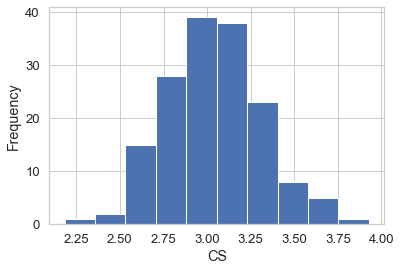

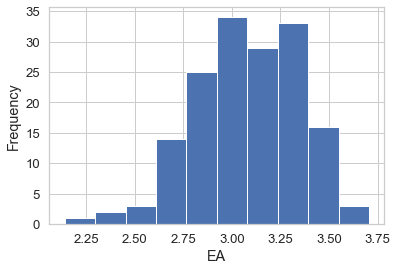

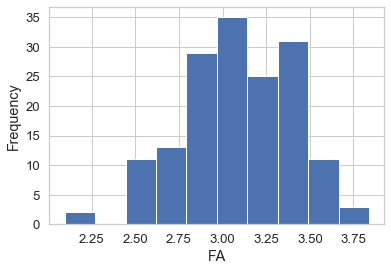

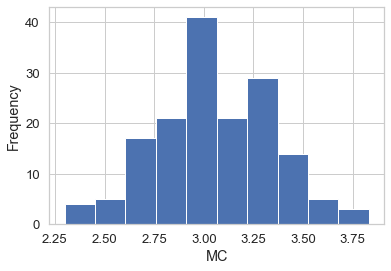

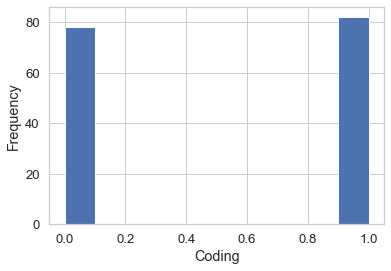

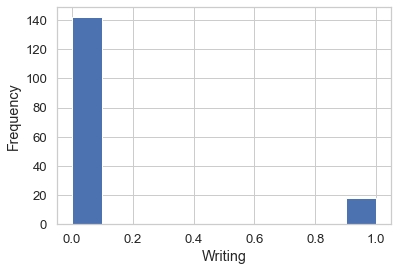

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


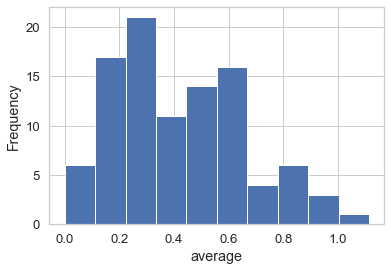

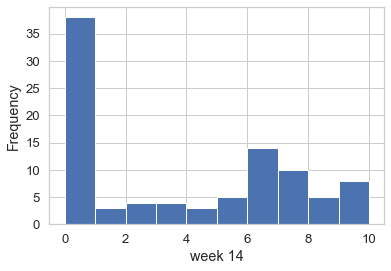

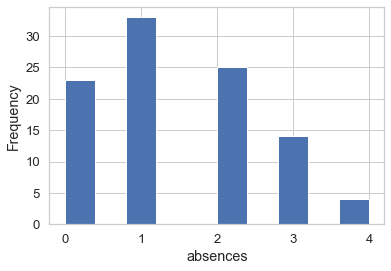

In [6]:
# show a histogram for each of the different columns
def printDescriptiveStats (dataframe): # prints the descriptive basic stats
    print('\nCount\n')
    print(dataframe.count()) 
    print('\nMean\n')
    print(dataframe.mean()) 
    print('\nSD\n')
    print(dataframe.std()) # note that Bessel's correction of n-1 is used by default
    print('\nMedian\n')
    print(dataframe.median())
    print('\nMax\n')
    print(dataframe.max())
    print('\nMin\n')
    print(dataframe.min())
    
    
printDescriptiveStats(SSSFinalCombinedData) 

for dataColumn in list(SSSFinalCombinedData):
    #plt.hist(data[dataColumn], bins=10, range=[2,4])
    plt.hist(SSSFinalCombinedData[dataColumn])
    plt.xlabel(dataColumn)
    plt.ylabel('Frequency')
    #plt.ylim(top=50)
    plt.show()

# Regression
For taking the SSS vs FA & MC Grades

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


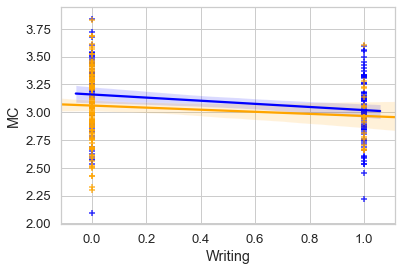

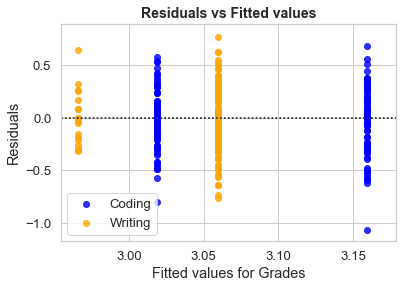

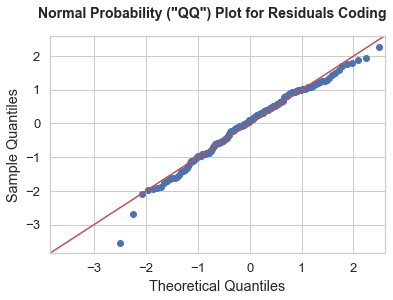

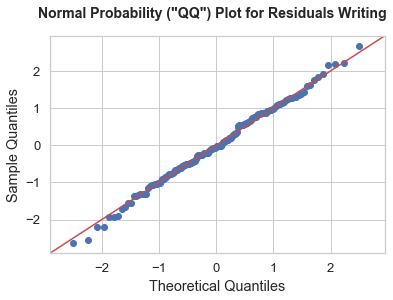

In [5]:
# Code edited from CS51 2.1 class cocalc, extra explanations added where needed
def regression_Double(column_x1, column_y1, column_x2, column_y2, data):
    global regressionmodel1, regressionmodel2
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''
    plt.figure()
    # This calculates a regression plot based on the equations we learned in class,
    # and probably some things we didn't learn on exactly how to easily calculate
    # this in python. Still explanation of this is outside of the scope of this paper
    sns.regplot(x=column_x1, y=column_y1, data=data, marker="+",fit_reg=True,color='blue')
    sns.regplot(x=column_x2, y=column_y2, data=data, marker="+",fit_reg=True,color='orange')    
    
    # We do the same thing above for two genders independently just to drawn the graph 9
    X1 = data[column_x1]
    X1 = statsmodels.add_constant(X1)
    Y1 = data[column_y1]
    regressionmodel1 = statsmodels.OLS(Y1,X1).fit() 
    X2 = data[column_x2]
    X2 = statsmodels.add_constant(X2)
    Y2 = data[column_y2]
    regressionmodel2 = statsmodels.OLS(Y2,X2).fit()

    
    # this section plots male and female graphs on top of each other for graph 9
    plt.figure()
    residualplot1 = sns.residplot(x=regressionmodel1.predict(), y=regressionmodel1.resid, color='blue', label='Coding')
    residualplot2 = sns.residplot(x=regressionmodel2.predict(), y=regressionmodel2.resid, color='orange',label='Writing')
    residualplot2.set(xlabel='Fitted values for Grades', ylabel='Residuals')
    residualplot2.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    residualplot2.legend()
    residualplot2.set_alpha(0.5)

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel1.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals Coding",fontweight='bold',fontsize=14)
    qqplot = statsmodels.qqplot(regressionmodel2.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals Writing",fontweight='bold',fontsize=14)
    
regression_Double('Coding', 'FA', 'Writing', 'MC', SSSFinalCombinedData)

In [6]:
regressionmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     8.693
Date:                Tue, 25 Feb 2020   Prob (F-statistic):            0.00368
Time:                        21:02:20   Log-Likelihood:                -33.964
No. Observations:                 160   AIC:                             71.93
Df Residuals:                     158   BIC:                             78.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1592      0.034     92.671      0.000       3.092       3.227
Coding        -0.1404      0.048     -2.948      0.004      -0.234      -0.046
==============================================================================
Omnibus:                        6.191   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.862
Skew:                          -0.457   Prob(JB):                       0.0533
Kurtosis:                       3.213   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
regressionmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MC   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.658
Date:                Tue, 25 Feb 2020   Prob (F-statistic):              0.200
Time:                        21:02:20   Log-Likelihood:                -27.991
No. Observations:                 160   AIC:                             59.98
Df Residuals:                     158   BIC:                             66.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0596      0.024    125.699      0.000       3.011       3.108
Writing       -0.0934      0.073     -1.288      0.200      -0.237       0.050
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.166
Skew:                          -0.059   Prob(JB):                        0.920
Kurtosis:                       2.894   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Histogram overlays

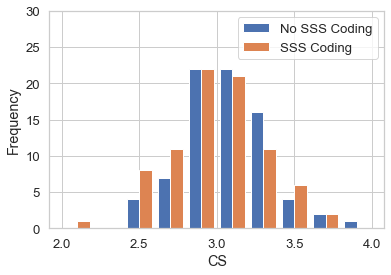

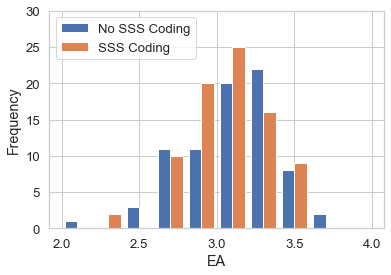

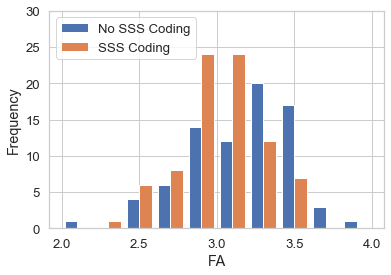

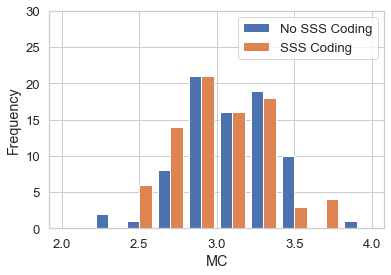

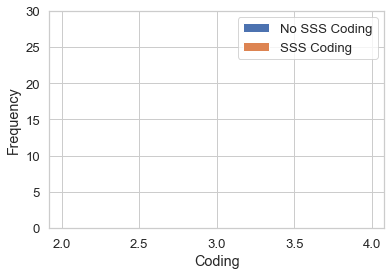

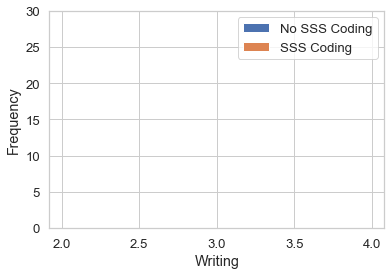

In [8]:
for dataColumn in list(data):
    plt.hist([(data[(data['Coding']==0)])[dataColumn],(data[(data['Coding']==1)])[dataColumn]], bins=10, range=[2,4], label=['No SSS Coding','SSS Coding'])
    plt.legend()
    plt.xlabel(dataColumn)
    plt.ylabel('Frequency')
    plt.ylim(top=30)
    plt.show()


# Artem's code for processing the excel

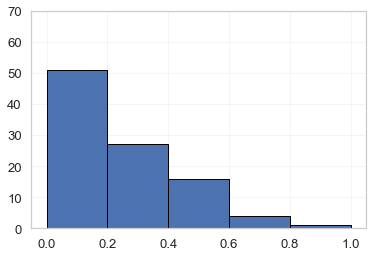

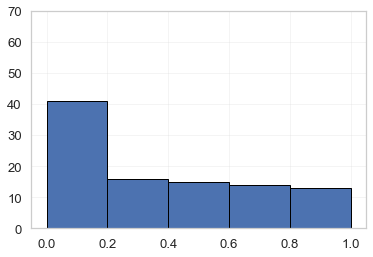

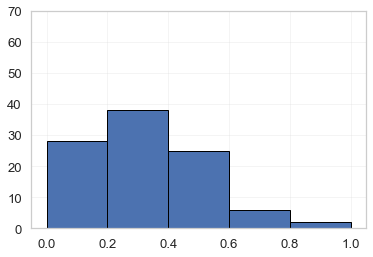

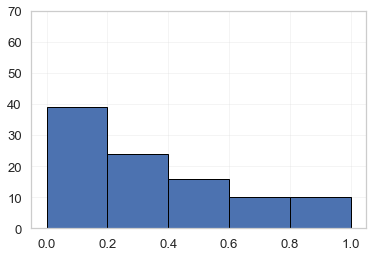

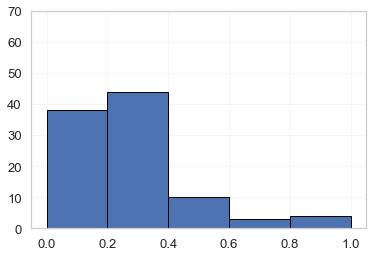

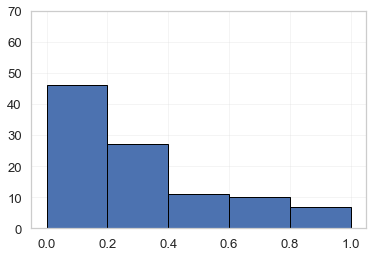

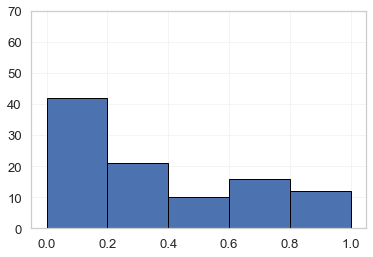

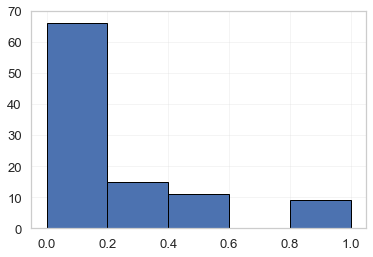

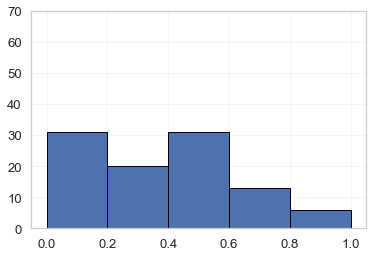

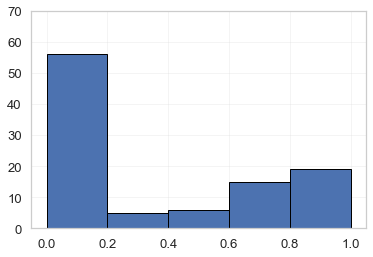

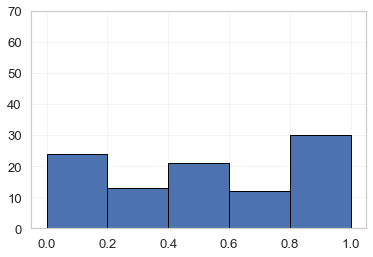

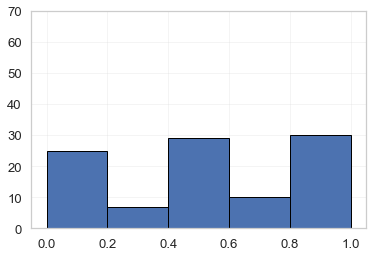

Done!


In [11]:
totals = [40, 28, 22, 23, 24, 23, 26, 22, 17, 6, 15, 10]
for i in range(2, 14):
    week_scores = []
    data = pandas.read_excel('Fall2019_Coding_SSS_Attendance_Tracker.xlsx', sheet_name=i)
    data = data.fillna(0)
    week_scores.append(data.loc[:, "Total Score "])
    for x in range(len(week_scores)):
        week_scores[x] = week_scores[x]/totals[i-2]
        
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.savefig('Coding score Histogram week '+str(i), dpi=300, bbox_inches='tight')
    plt.show()
    
print('Done!')

# More Regression
How assignment weights that week, whether there is an assignment same day or not, and 'notebook difficulty' affects how many students will be absent that week

In [12]:
contextualData = pandas.read_csv("Assignment Dates - CSV Export.csv")
contextualData = contextualData.dropna()
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence
0,0,0,55.714286,6.0
1,0,0,69.444444,5.0
2,6,1,71.000000,11.0
3,8,0,74.285714,10.0
4,9,1,63.571429,36.0
5,0,0,80.000000,15.0
6,0,0,54.166667,5.0
7,8,0,69.285714,9.0
8,8,1,90.000000,15.0
9,14,0,80.000000,13.0


In [7]:
# Code edited from CS51 2.1 class cocalc, extra explanations added where needed
def mult_regression(column_x, column_y, _data):
    global regressionmodel
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''
    if len(column_x)==1:
        plt.figure()
        # This calculates a regression plot based on the equations we learned in class,
        # and probably some things we didn't learn on exactly how to easily calculate
        # this in python. Still explanation of this is outside of the scope of this paper
        sns.regplot(x=column_x[0], y=column_y, data=_data, marker="+",fit_reg=True,color='orange')
    
    data = _data
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() 

    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='orange', label='Regression')
    residualplot.set_alpha(0.5)
    plt.show()

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)
    
mult_regression(['Weight','SameDay','Difficulty'],'Absence', contextualData)
regressionmodel.summary()

NameError: name 'contextualData' is not defined

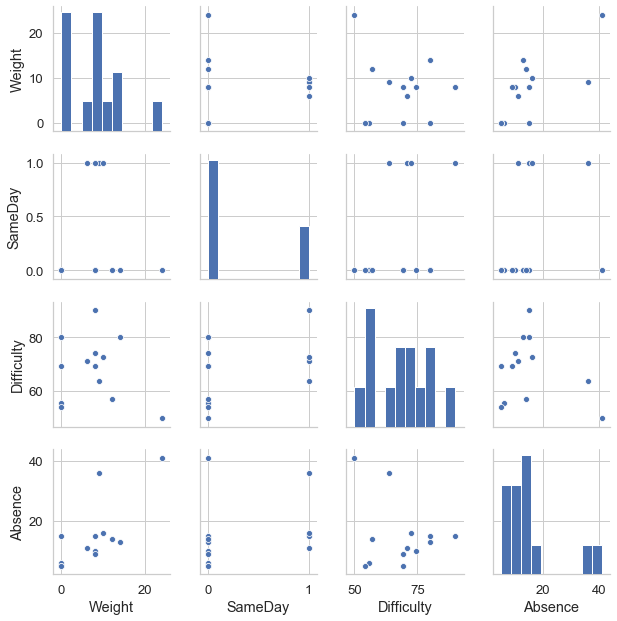

In [33]:
column_x = ['Weight','SameDay','Difficulty']
column_y = 'Absence'
columnstoplot = column_x + [column_y]

sns.pairplot(contextualData[columnstoplot], x_vars=columnstoplot, y_vars=columnstoplot, height=2.2);

# Even More Regression
How Notebook 'difficulty' correlates with average notebook scores

In [44]:
contextualData = pandas.read_csv("Assignment Dates - CSV Export.csv")
contextualData = contextualData.dropna()
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence
0,0,0,55.714286,6.0
1,0,0,69.444444,5.0
2,6,1,71.000000,11.0
3,8,0,74.285714,10.0
4,9,1,63.571429,36.0
5,0,0,80.000000,15.0
6,0,0,54.166667,5.0
7,8,0,69.285714,9.0
8,8,1,90.000000,15.0
9,14,0,80.000000,13.0


In [12]:
totals = [10,15,6, 17,22,26,23,24,23,22,28,1,40,10]
averages = []
data = pandas.read_csv('F19 Coding SSS Attendance Tracker.csv')
data = data.fillna(0)
data.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,9.0,9.0,0.0,7,0.0,0.0,5.0,8.0,13.0,7.0,11.0,0.0,0.0,0.0
1,7.0,11.0,0.0,6,9.0,18.0,19.0,10.0,19.0,9.0,8.0,0.0,23.0,5.0
2,7.0,5.0,0.0,2,0.0,2.0,4.0,7.0,3.0,7.0,5.0,0.0,9.0,0.0
3,6.0,0.0,0.0,1,1.0,1.0,2.0,0.0,2.0,2.0,5.0,0.0,0.0,5.0
4,8.0,15.0,0.0,5,9.0,2.0,4.0,4.0,0.0,5.0,13.0,0.0,10.0,4.0


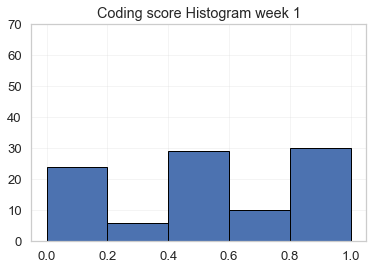

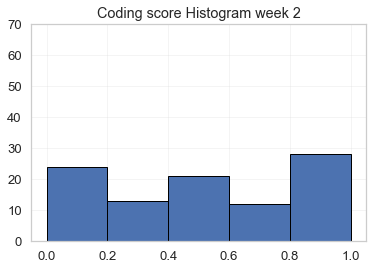

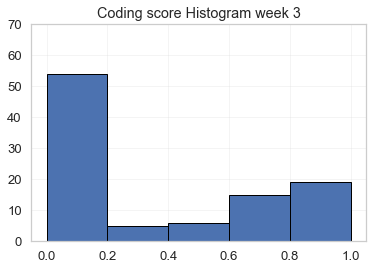

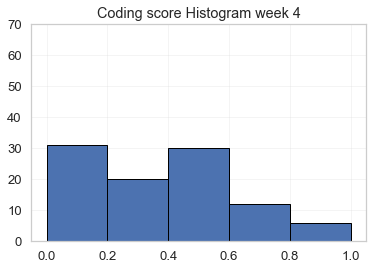

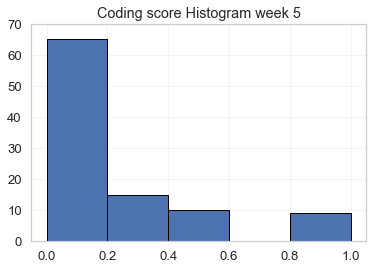

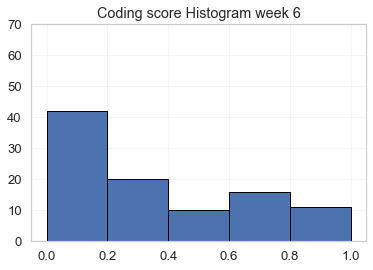

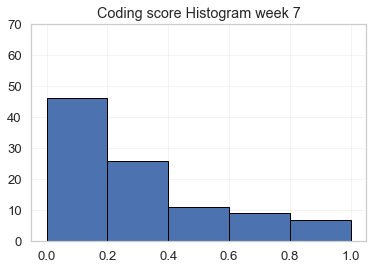

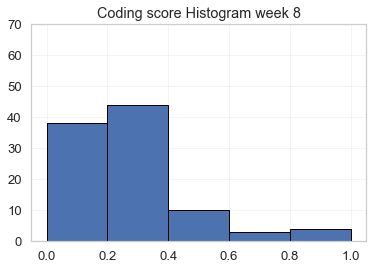

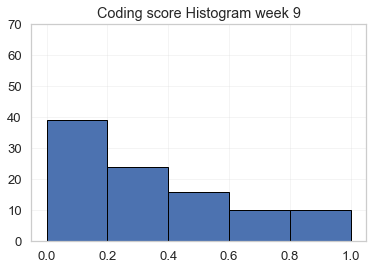

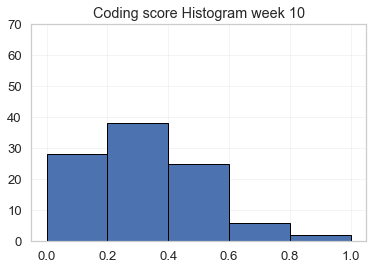

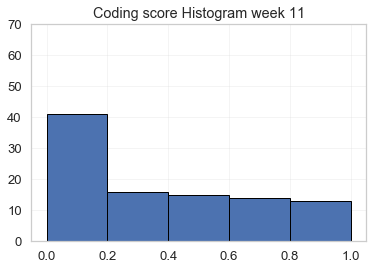

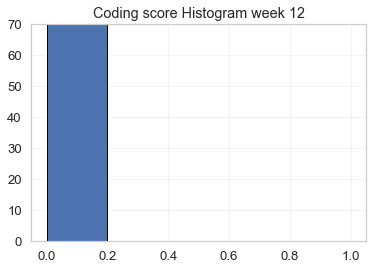

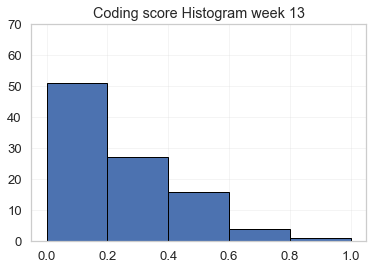

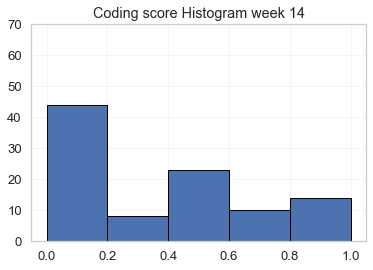

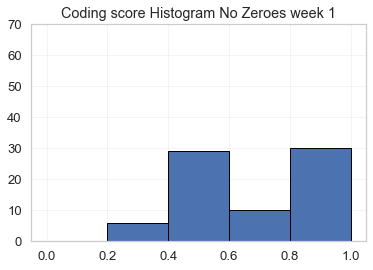

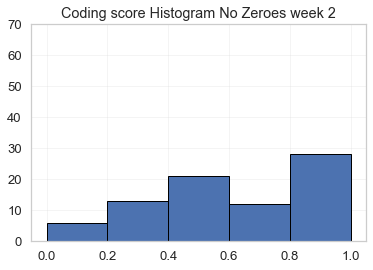

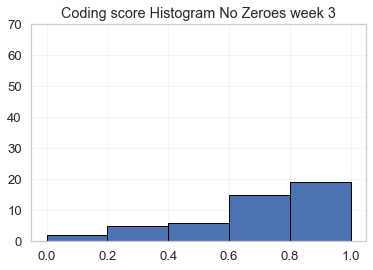

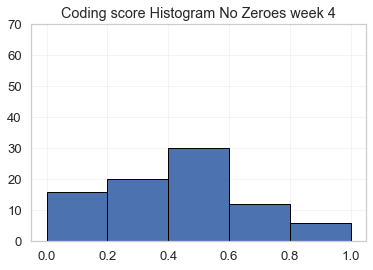

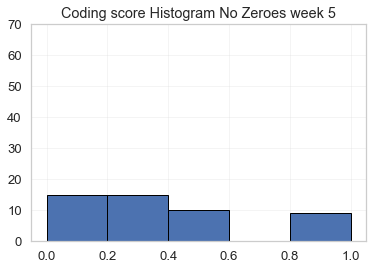

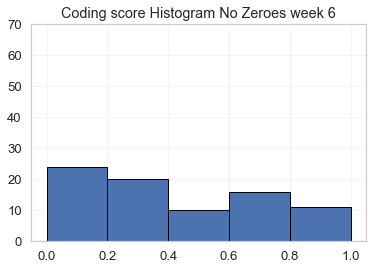

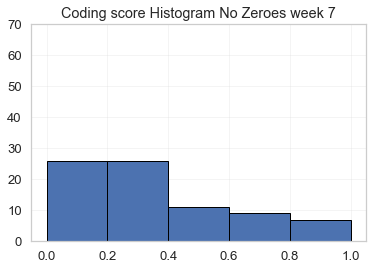

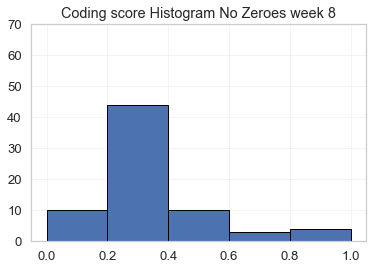

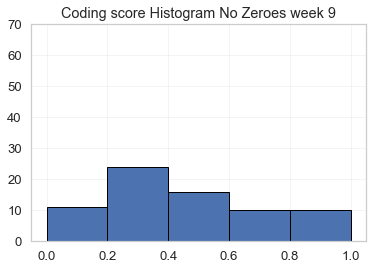

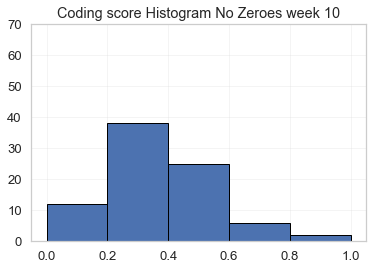

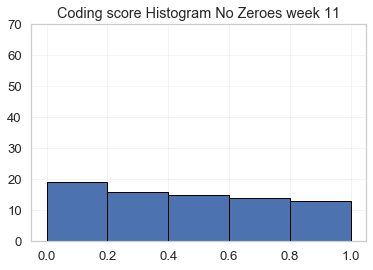

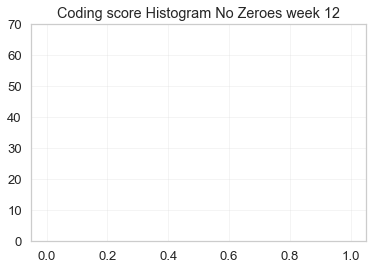

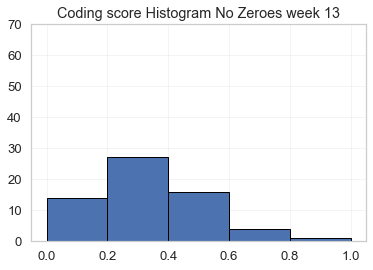

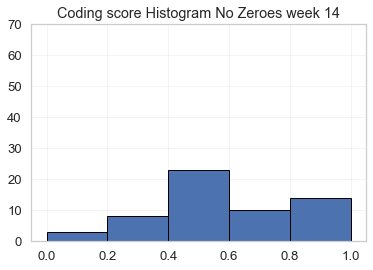

Done


In [14]:
for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        #if i == 12:
        #    print(week_scores[x], totals[i], '=',week_scores[x]/totals[i])
        week_scores[x] = week_scores[x]/totals[i]
    
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.title('Coding score Histogram week '+str(i+1))
    plt.savefig('Coding score Histogram week '+str(i+1), dpi=300, bbox_inches='tight')
    plt.show()
    
for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        #if i == 12:
        #    print(week_scores[x], totals[i], '=',week_scores[x]/totals[i])
        week_scores[x] = week_scores[x]/totals[i]
    
    week_scores = list(filter(lambda a: a != 0, week_scores))
    
    plt.hist(week_scores, ec='black', bins=5, range=[0,1])
    plt.ylim(top=70)
    plt.grid(alpha=.2)
    plt.title('Coding score Histogram No Zeroes week '+str(i+1))
    plt.savefig('Coding score Histogram No Zeroes week '+str(i+1), dpi=300, bbox_inches='tight')
    plt.show()
    
print('Done')

In [90]:
averages = []
for i in range(0, 14):
    week_scores = []
    week_scores = list(data["Week " + str(i+1)].astype(float))
    for x in range(len(week_scores)):
        week_scores[x] = week_scores[x]/totals[i]
    if i == 11:
        continue
    week_scores = list(filter(lambda a: a != 0, week_scores))
    averages.append(sum(week_scores)/len(week_scores))

In [91]:
len(averages)

13

In [92]:
contextualData['Averages'] = averages

In [93]:
contextualData.head(20)

,Weight,SameDay,Difficulty,Absence,Averages
0,0,0,55.714286,6.0,0.650667
1,0,0,69.444444,5.0,0.633333
2,6,1,71.000000,11.0,0.684397
3,8,0,74.285714,10.0,0.432773
4,9,1,63.571429,36.0,0.383581
5,0,0,80.000000,15.0,0.432099
6,0,0,54.166667,5.0,0.369290
7,8,0,69.285714,9.0,0.340376
8,8,1,90.000000,15.0,0.465524
9,14,0,80.000000,13.0,0.372809


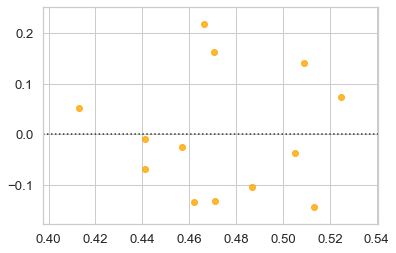

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Averages   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8123
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.387
Time:                        20:25:07   Log-Likelihood:                 9.5545
No. Observations:                  13   AIC:                            -15.11
Df Residuals:                      11   BIC:                            -13.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6648      0.215      3.097      0.010       0.192       1.137
Difficulty    -0.0014      0.002     -0.901      0.387      -0.005       0.002
Difficulty    -0.0014      0.002     -0.901      0.387      -0.005       0.002
==============================================================================
Omnibus:                        1.474   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.039
Skew:                           0.447   Prob(JB):                        0.595
Kurtosis:                       1.942   Cond. No.                     3.86e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

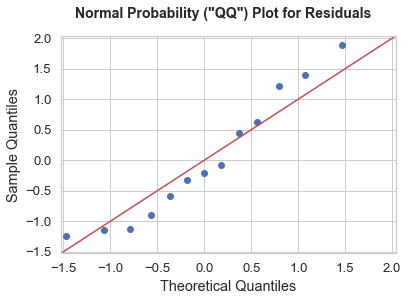

In [100]:
mult_regression(['Difficulty','Difficulty'],'Averages', contextualData)
regressionmodel.summary()

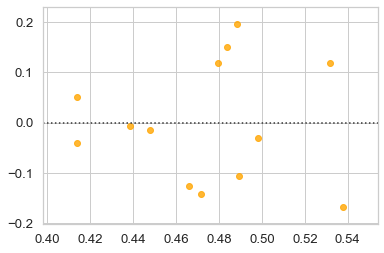

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Averages   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.358
Method:                 Least Squares   F-statistic:                    0.2084
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.927
Time:                        20:32:26   Log-Likelihood:                 9.7358
No. Observations:                  13   AIC:                            -9.472
Df Residuals:                       8   BIC:                            -6.647
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7335      0.304      2.409      0.043       0.032       1.435
Weight        -0.0019      0.009     -0.205      0.843      -0.023       0.019
SameDay        0.0258      0.106      0.245      0.813      -0.218       0.269
Difficulty    -0.0035      0.004     -0.842      0.424      -0.013       0.006
Absence       -0.0008      0.006     -0.126      0.903      -0.015       0.014
==============================================================================
Omnibus:                        1.604   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                0.867
Skew:                           0.178   Prob(JB):                        0.648
Kurtosis:                       1.786   Cond. No.                         541.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

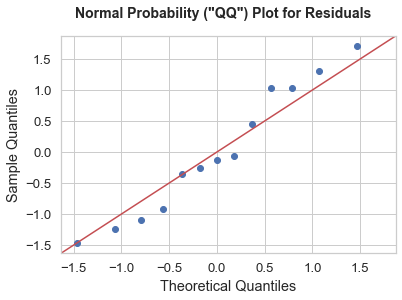

In [103]:
mult_regression(['Weight','SameDay','Difficulty','Absence'],'Averages', contextualData)
regressionmodel.summary()

# Overall  scores vs last assessment scores

In [29]:
'''
SSSFinalCombinedData = \
SSSFinalCombinedData.rename(columns={"Overall CS": "CS", "Overall EA": "EA", "Overall FA": "FA", "Overall MC": "MC",\
                  'Q22_Coding': 'Coding', 'Q22_Writing':'Writing'})
                  average, week 14, absences
                  '''

#noWeek14 = SSSFinalCombinedData['week 14'].astype(str) == "0.0"
#for i in range(len(SSSFinalCombinedData['week 14'])):
#    if noWeek14[i]:
#        SSSFinalCombinedData.loc[i,'week 14'] = np.nan
SSSFinalCombinedData = SSSFinalCombinedData.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


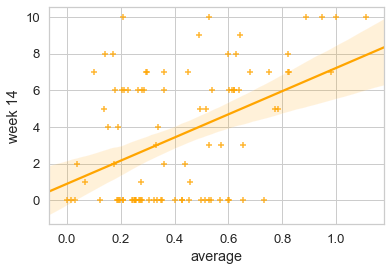

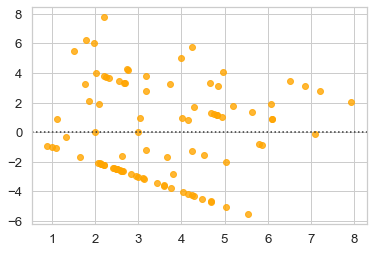

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week 14   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     22.76
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.87e-06
Time:                        14:45:56   Log-Likelihood:                -239.92
No. Observations:                  94   AIC:                             483.8
Df Residuals:                      92   BIC:                             488.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8938      0.641      1.395      0.166      -0.379       2.166
average        6.3235      1.325      4.771      0.000       3.691       8.956
==============================================================================
Omnibus:                       10.274   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.664
Skew:                           0.302   Prob(JB):                       0.0971
Kurtosis:                       2.091   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

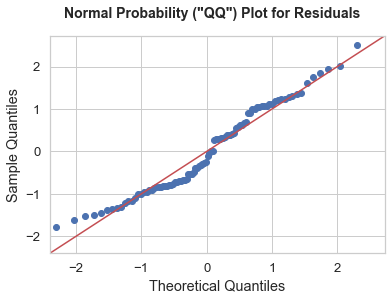

In [13]:
#SSSFinalCombinedData.describe()
#SSSFinalCombinedData.head()

mult_regression(['average'],'week 14', SSSFinalCombinedData)
regressionmodel.summary()

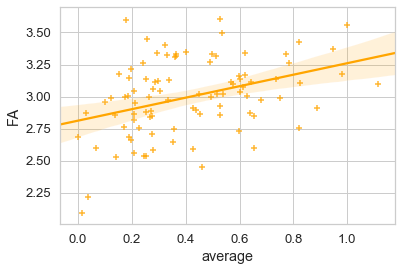

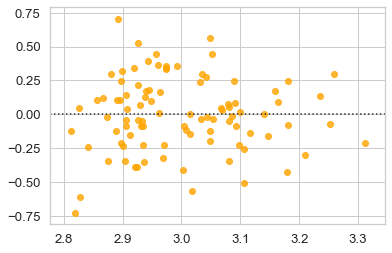

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     15.19
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           0.000184
Time:                        14:46:59   Log-Likelihood:                -10.116
No. Observations:                  94   AIC:                             24.23
Df Residuals:                      92   BIC:                             29.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8120      0.056     50.584      0.000       2.702       2.922
average        0.4481      0.115      3.898      0.000       0.220       0.676
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.094
Skew:                          -0.075   Prob(JB):                        0.954
Kurtosis:                       2.961   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

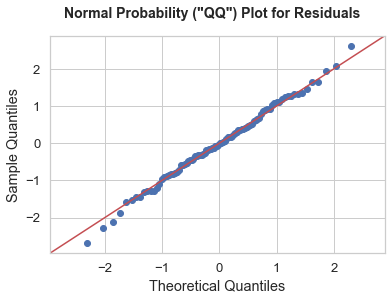

In [14]:
mult_regression(['average'],'FA', SSSFinalCombinedData)
regressionmodel.summary()

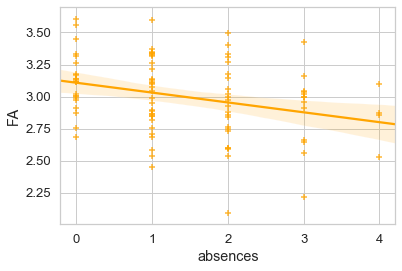

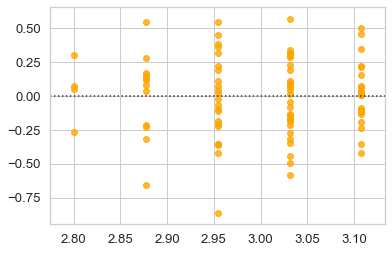

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     8.757
Date:                Mon, 09 Mar 2020   Prob (F-statistic):            0.00392
Time:                        14:48:34   Log-Likelihood:                -13.026
No. Observations:                  94   AIC:                             30.05
Df Residuals:                      92   BIC:                             35.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1078      0.047     66.376      0.000       3.015       3.201
absences      -0.0769      0.026     -2.959      0.004      -0.129      -0.025
==============================================================================
Omnibus:                        1.743   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.404
Skew:                          -0.298   Prob(JB):                        0.496
Kurtosis:                       3.063   Cond. No.                         3.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

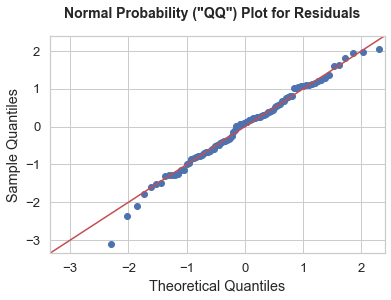

In [19]:
mult_regression(['absences'],'FA', SSSFinalCombinedData)
regressionmodel.summary()

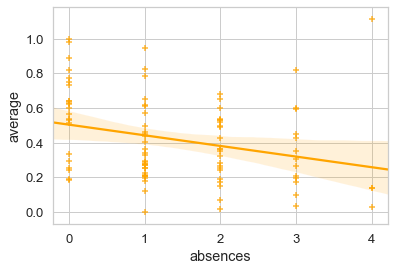

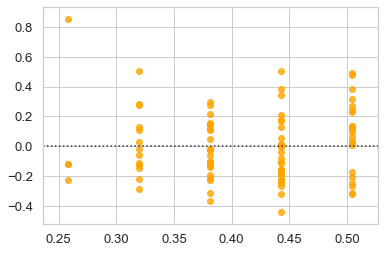

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     7.842
Date:                Mon, 09 Mar 2020   Prob (F-statistic):            0.00622
Time:                        14:49:46   Log-Likelihood:                 2.9291
No. Observations:                  94   AIC:                            -1.858
Df Residuals:                      92   BIC:                             3.228
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5041      0.040     12.759      0.000       0.426       0.583
absences      -0.0614      0.022     -2.800      0.006      -0.105      -0.018
==============================================================================
Omnibus:                       11.173   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.395
Skew:                           0.784   Prob(JB):                      0.00335
Kurtosis:                       3.670   Cond. No.                         3.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

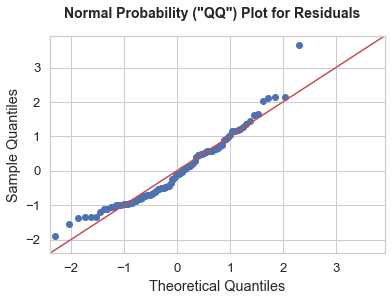

In [20]:
mult_regression(['absences'],'average', SSSFinalCombinedData)
regressionmodel.summary()

# Lab completion vs scores

In [30]:
SSSFinalCombinedData = SSSFinalCombinedData.dropna()

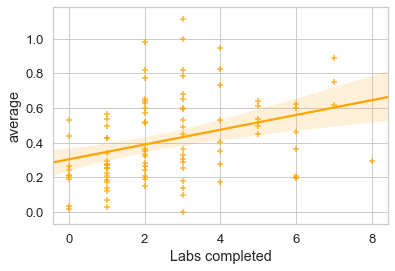

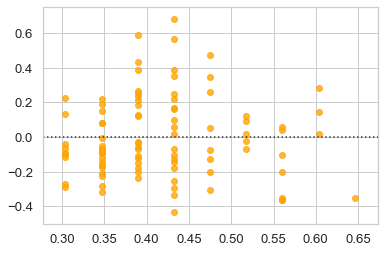

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     11.36
Date:                Mon, 09 Mar 2020   Prob (F-statistic):            0.00110
Time:                        15:29:48   Log-Likelihood:                 4.5578
No. Observations:                  94   AIC:                            -5.116
Df Residuals:                      92   BIC:                          -0.02903
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3039      0.041      7.357      0.000       0.222       0.386
Labs completed     0.0428      0.013      3.371      0.001       0.018       0.068
==============================================================================
Omnibus:                        6.144   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.888
Skew:                           0.611   Prob(JB):                       0.0526
Kurtosis:                       3.098   Cond. No.                         5.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

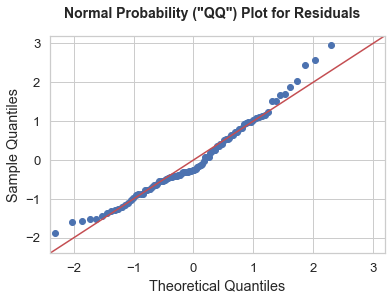

In [34]:
mult_regression(['Labs completed'],'average', SSSFinalCombinedData)
regressionmodel.summary()

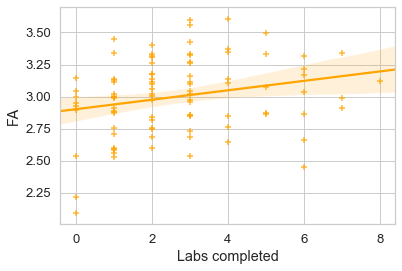

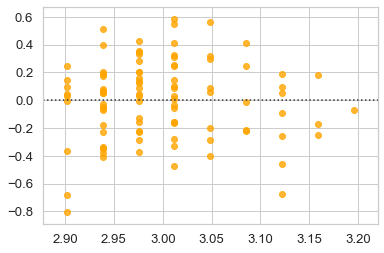

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.602
Date:                Mon, 09 Mar 2020   Prob (F-statistic):             0.0200
Time:                        15:40:18   Log-Likelihood:                -14.521
No. Observations:                  94   AIC:                             33.04
Df Residuals:                      92   BIC:                             38.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9015      0.051     57.333      0.000       2.801       3.002
Labs completed     0.0368      0.016      2.367      0.020       0.006       0.068
==============================================================================
Omnibus:                        1.608   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.433
Skew:                          -0.301   Prob(JB):                        0.488
Kurtosis:                       2.945   Cond. No.                         5.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

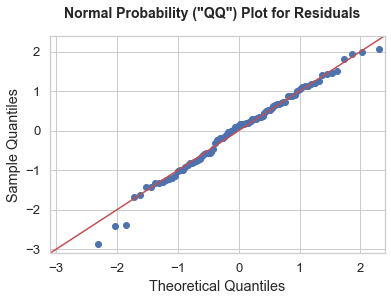

In [35]:
mult_regression(['Labs completed'],'FA', SSSFinalCombinedData)
regressionmodel.summary()

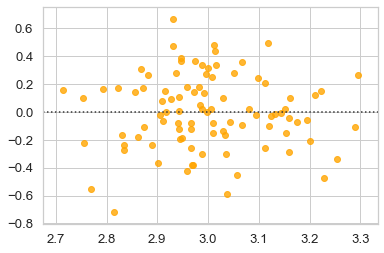

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FA   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     10.03
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           0.000116
Time:                        16:24:45   Log-Likelihood:                -7.9370
No. Observations:                  94   AIC:                             21.87
Df Residuals:                      91   BIC:                             29.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9164      0.074     39.297      0.000       2.769       3.064
average        0.3796      0.118      3.226      0.002       0.146       0.613
absences      -0.0536      0.026     -2.078      0.041      -0.105      -0.002
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.308
Skew:                          -0.124   Prob(JB):                        0.857
Kurtosis:                       2.869   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

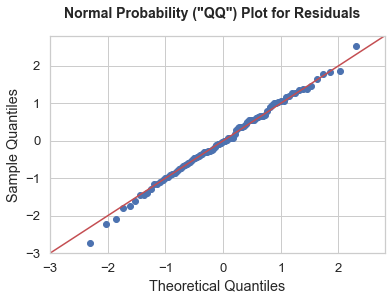

In [57]:
mult_regression(['average','absences'],'FA', SSSFinalCombinedData)
regressionmodel.summary()